<h1><center><b>Capstone Project</b></center></h1>
<h3><center>The Battle of Neighborhoods</center></h3>
<h4><center>Investigation of Moscow regions</center></h4>


<h2>Introduction</h2>

<div style='padding:0 120px 0 90px;'> 
<h4 style=' line-height: 1.5em; text-indent: 2.5em; text-align: justify;'>Moscow is one of the fastest growing European cities and the largest Russian city.
Currently, the population of Moscow is more than 12 million people, and the population growth exceeds 100,000 people per year.
Residents of the city and official authorities are constantly faced with problems associated with urbanization.
These are environmental problems, transport, overpopulation, uneven population density, tax regulation, financing, problems of recreation and entertainment.</h4>
</div>

<h2>Business Problem</h2>

<div style='padding:0 120px 0 90px;'>  
<h4 style=' line-height: 1.5em; text-indent: 2.5em; text-align: justify;'>One of the areas of regulation is to eliminate the asymmetry in the location of urban infrastructure centers and to promote the development of venues in certain areas where their absence is obvious. And vice versa, closing and moving venues, the number of which exceeds the necessary indicators. Significant help in managing these areas can be provided by Data Science and special methods for detecting hidden patterns. Thus, the problem is to find non-obvious patterns in the distribution of urban infrastructure centers in the context of each individual district of the city.</h4>
</div>

<h2>Data descriptiion</h2>

<div style='padding:0 120px 0 90px;'> 
<h4 style=' line-height: 1.5em; text-indent: 2.5em; text-align: justify;'>Using the Foursquare service allows you to get a list of objects for each of 146 districts of the city of Moscow. A subsequent analysis of the distribution of objects by district will allow us to find hidden dependencies. The predominance of objects belonging to a certain category over objects of other categories will allow us to build a certain rating of districts and combine them into groups. At the same time, segmentation and clustering (K-means) will allow us to quickly identify unknown patterns. A certain difficulty with this approach will lie in the process of verifying that a particular venue belongs to a specific area of the city. To solve this problem, we will need to describe the boundaries of each region in the form of a polygon. In the future, having calculated the location of the central point for each region, as well as the radius of the surrounding circle, it will be possible to filter out places that are included exclusively in a specific area. After additional transformations, an array of sites can be processed using the K-means algorithm. Then we can analyze the formed clusters.</h4>
    <h4 style=' line-height: 1.5em; text-indent: 2.5em; text-align: justify;'>Fortunately, we can get geo-points for the polygons of each district of the city on the website <a href='http://gis-lab.info'>http://gis-lab.info</a>. File format is CSV and every row is geo data for a district.</h4>
    </div>
    
<h3><i>Sample data:</i></h3>

<h3><b>
    </b></h3>

<h2>Methodology</h2>

<div style='padding:0 120px 0 90px;'>
<h4 style=' line-height: 1.5em; text-indent: 2.5em; text-align: justify;'>
In the next steps we'll 
<ul>    
    <li>load necessary data</li>
    <li>make some cleaning of the data</li>
    <li>build additional lists of geo points</li>
    <li>visualize preliminary results</li>
    <li>choose the best parameters for K-means method</li>
    <li>run K-means</li>
    <li>visualize results</li>
    <li>recap</li>    
</ul>    
</h4>
</div>

<h3>Collecting data</h3>

<div style='padding:0 120px 0 90px;'>
<h4 style=' line-height: 1.5em; text-indent: 2.5em; text-align: justify;'>
We can load data from http://gis-lab.info site. Data is archived so we have to unzip the file needed.</h4>
</div>

In [209]:
# Load CSV data from the resource
!wget -nc 'http://gis-lab.info/data/mos-adm/mo-csv.zip'

File ‘mo-csv.zip’ already there; not retrieving.



In [179]:
import requests
import pandas as pd
import numpy as np
from zipfile import ZipFile

zip_file = ZipFile('mo-csv.zip')
moscow_regions = pd.read_csv(zip_file.open('mo.csv'))
moscow_regions['index']=moscow_regions.index
moscow_regions

,WKT,NAME,OKATO,OKTMO,NAME_AO,OKATO_AO,ABBREV_AO,TYPE_MO,index
0,"MULTIPOLYGON (((36.8031012 55.4408329,36.80319...",Киевский,45298555,45945000,Троицкий,45298000,Троицкий,Поселение,0
1,"POLYGON ((37.4276499 55.7482092,37.4284863 55....",Филёвский Парк,45268595,45328000,Западный,45268000,ЗАО,Муниципальный округ,1
2,"POLYGON ((36.8035692 55.4516224,36.8045117 55....",Новофёдоровское,45298567,45954000,Троицкий,45298000,Троицкий,Поселение,2
3,"POLYGON ((36.9372397 55.2413907,36.9372604 55....",Роговское,45298575,45956000,Троицкий,45298000,Троицкий,Поселение,3
4,"POLYGON ((37.4395575 55.6273129,37.4401803 55....","""Мосрентген""",45297568,45953000,Новомосковский,45297000,Новомосковский,Поселение,4
...,...,...,...,...,...,...,...,...,...
141,"POLYGON ((37.7998089 55.7623198,37.7998143 55....",Ивановское,45263567,45306000,Восточный,45263000,ВАО,Муниципальный округ,141
142,"POLYGON ((37.8360239 55.709776,37.8361995 55.7...",Косино-Ухтомский,45263573,45308000,Восточный,45263000,ВАО,Муниципальный округ,142
143,"POLYGON ((37.8404157 55.7304867,37.8406349 55....",Новокосино,45263579,45310000,Восточный,45263000,ВАО,Муниципальный округ,143
144,"POLYGON ((37.9061276 55.7062585,37.9070118 55....",Некрасовка,45290574,45391000,Юго-Восточный,45290000,ЮВАО,Муниципальный округ,144


<h2>Prepare data</h2>

<div style='padding:0 120px 0 90px;'>
<h4 style=' line-height: 1.5em; text-indent: 2.5em; text-align: justify;'>
Now we have to prepare our data. For further correct calculations we have to extract several lists from the gathered table.</h4>
</div>

<div style='padding:0 120px 0 90px;'>
<h4 style=' line-height: 1.5em; text-indent: 2.5em; text-align: justify;'>
<ul>
<li>List of polygonal segments which constitutes city region's borders. Extracted from moscow_regions.</li>
<li>List of coordinates of a center for every segment. Center point is actually a geometric center of a plane figure and calculated as the arithmetic mean position of all the points. I used spherical coordinates here, and this is not entirely correct, but acceptable for our case.</li>
<li>List of polygones' radiuses. It is calculated as the farthest point from the center, belonging to the polygon.</li>
</ul>
</h4>
</div>

In [180]:
import re, math

# Build a list of polylines displaying the boundaries of regions
regionPolyList = []
for index,aRow in moscow_regions.iterrows():
    strPolyList = re.findall(r"\(([\d+\.\s\,]+)\)", aRow['WKT'], re.MULTILINE)
    regionSegments = []
    for strPoly in strPolyList:
        coord_pairs = re.findall(r"[\d\.]+ [\d\.]+", strPoly, re.MULTILINE)
        polyline=[]
        for pair in coord_pairs:            
            polyline.append([float(pair.split(' ')[1]), float(pair.split(' ')[0])])
        regionSegments.append(polyline)
    regionPolyList.append(regionSegments)

# Calculate coordinates of centers for regions  
regionCentersList = []
for segments in regionPolyList:
    segmentCenterList = []
    for segment in segments:
        c = [0.0, 0.0]
        for point in segment:
            c[0] = c[0] + point[0]
            c[1] = c[1] + point[1]
        c[0] = c[0]/len(segment)
        c[1] = c[1]/len(segment)
        segmentCenterList.append(c)
    regionCentersList.append(segmentCenterList)

# Calculate radiuses of embracing circle for each region
radiusesList = []
for regionIndex in range(0, len(regionPolyList)):
    segments = regionPolyList[regionIndex]
    centers = regionCentersList[regionIndex]
    radiuses = []
    for segIndex in range(0, len(segments)):
        segment = segments[segIndex] 
        center = centers[segIndex]
        distMax=0.0 
        for point in segment:            
            dist = 2*6371000*math.asin(math.sqrt(math.sin(math.radians((point[0]-center[0])/2))*math.sin(math.radians((point[0]-center[0])/2)) + \
                                                math.cos(math.radians(center[0]))*math.cos(math.radians(point[0]))* \
                                                math.sin(math.radians((center[1]-point[1])/2))*math.sin(math.radians((center[1]-point[1])/2))))
            if dist>=distMax:
                distMax = dist
        radiuses.append(distMax)
    radiusesList.append(radiuses)

<div style='padding:0 120px 0 90px;'>
<h4 style=' line-height: 1.5em; text-indent: 2.5em; text-align: justify;'>
Now we know coordinates of center point for every city region. We can call Foursquare API sending this central point and region's radius for a complete list of target venues.</h4>
</div>

<div style='padding:0 120px 0 90px;'>
<h4 style=' line-height: 1.5em; text-indent: 2.5em; text-align: justify;'>But first lets visualize region borders on the map.</h4>
</div>

In [4]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge

The following packages will be UPDATED:

    certifi: 2019.6.16-py36_1 conda-forge --> 2019.9.11-py36_0 conda-forge


certifi-2019.9.11    | 147 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [182]:
import folium

map = folium.Map(location=[55.7532358, 37.6225412], zoom_start=8.5)

regions = folium.map.FeatureGroup()
for index in range(0, moscow_regions.shape[0]):
    regionName = moscow_regions.iloc[index, 1]
    for segmentIndex in range(0, len(regionPolyList[index])):
        segment = regionPolyList[index][segmentIndex]                                      
        regions.add_child( folium.features.PolygonMarker(segment, color='blue', fill_color='#ffffb7') )
        #segmentCenter = regionCentersList[index][segmentIndex]
        #segmentRadius = radiusesList[index][segmentIndex]
map.add_child(regions)
map

<div style='padding:0 120px 0 90px;'>
<h4 style=' line-height: 1.5em; text-indent: 2.5em; text-align: justify;'>
Even on this stage, looking at the received map, we can notice some positional patterns in the division of the city into regions. We see a pronounced
central rounded region, a large appendix of the recent suburbs, protruding to the southwest, and two small enclaves in the west. In the future, it will be possible to try to compare the dependencies obtained by machine learning methods with the positioning of areas on the map.</h4>
</div>

<div style='padding:0 120px 0 90px;'>
<h4 style=' line-height: 1.5em; text-indent: 2.5em; text-align: justify;'>
Now we are ready to obtain venues for every city region. So lets do it.</h4>
</div>

In [183]:
CLIENT_ID = 'FJD2JBCQJ2XMELUIEZQXSLX01Q0QTXK1HT1WQIWTJCSPA2G1' # your Foursquare ID
CLIENT_SECRET = 'W2XREFIWN3ZANL1C4SPB5Q4G00DGT3Z3LNANDIFUYPLA0UUH' # your Foursquare Secret
VERSION = '20190923'

In [184]:
import os.path
import json
import sys

# Test whether a point belongs to a polygone
def inPolygon(x, y, segments):
    c=0
    for seg in segments:
        for i in range(1, len(seg)):
            p = seg[i]
            pp = seg[i-1]
            if (((p[1]<=y and y<pp[1]) or (pp[1]<=y and y<p[1])) and \
                (x > (pp[0] - p[0]) * (y - p[1]) / (pp[1] - p[1]) + p[0])): c = 1 - c    
    return c

# Build a list of venues 
def getNearbyVenues(regionIndice, names, locations, radiuses):
    LIMIT=1000
    FOLDER='res'
    symbols = (u"абвгдеёжзийклмнопрстуфхцчшщъыьэюяАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ",
               u"abvgdeejzijklmnoprstufhzcss_y_euaABVGDEEJZIJKLMNOPRSTUFHZCSS_Y_EUA")

    tr = {ord(a):ord(b) for a, b in zip(*symbols)}
    
    if not os.path.exists(FOLDER):
        os.mkdir(FOLDER)
    print('Loading\n[', end='')
    venues_list=[]
    for regIndex, name, locationsList, radiusesList in zip(regionIndice, names, locations, radiuses):
        regionNameLat = name.translate(tr)
        for location, radius, segIndex in zip(locationsList, radiusesList, range(0,len(locationsList))):
            fileName = "{}/{}_{}.json".format(FOLDER, regionNameLat, segIndex)
            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                location[0], 
                location[1], 
                radius, 
                LIMIT)
            
            ioError = False
            responseCode = 0
            try:
                # first try to load local file
                if os.path.exists(fileName):
                    with open(fileName, 'r') as readfile:                        
                        results = json.load(readfile)
                        print('.', end='')
                        #print("Loaded locally {} - {} [size:{}]".format(regIndex, fileName, sys.getsizeof(results)))
                else:
                    # make the GET request
                    resp = requests.get(url)
                    responseCode = resp.status_code
                    if resp.status_code == 200:
                        jsonResponse = resp.json()                        
                        results = jsonResponse['response']['groups'][0]['items']
                        print('.', end='')
                        with open(fileName, 'w') as writefile:
                            json.dump(results, writefile)
                            print ("Save to local file {} - {}".format(regIndex, fileName))
                    else:
                        ioError = True
                        print("IOError. Response code {}".format(resp.status_code))
            except Exception as ex:
                print('Error {} calling {}'.format(ex, url))
                if os.path.exists(fileName):
                    with open(fileName, 'r') as readfile:                        
                        results = json.load(readfile)
                        #print ("Loaded locally due to an error {} - {}".format(regIndex, fileName))
                        print('.', end='')
                        
            # return only relevant information for each nearby venue
            if not ioError:
                venues_list.append([(
                    int(round(regIndex)), 
                    regionNameLat, 
                    location[0], 
                    location[1], 
                    v['venue']['name'].translate(tr), 
                    v['venue']['location']['lat'], 
                    v['venue']['location']['lng'], 
                    v['venue']['categories'][0]['name']) for v in results])

    print(']')
    
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    if (nearby_venues.shape[0] > 1):
        nearby_venues.columns = ['Region index',
                      'Neighbourhood', 
                      'Neighbourhood Latitude', 
                      'Neighbourhood Longitude', 
                      'Venue', 
                      'Venue Latitude', 
                      'Venue Longitude', 
                      'Venue Category']
    
    return(nearby_venues)

#### Load venues for 146 regions

In [185]:
venues = getNearbyVenues(moscow_regions['index'], moscow_regions['NAME'], regionCentersList, radiusesList)

Loading
[............................................................................................................................................................]


In [186]:
print(venues.shape)
venues.head()

(13493, 8)


,Region index,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Kievskij,55.391999,36.907018,Mogutovo,55.354818,36.890202,Campground
1,0,Kievskij,55.391999,36.907018,Park «Sosny»,55.467084,36.935202,Park
2,0,Kievskij,55.391999,36.907018,Akovlevskij park,55.467536,36.934636,Park
3,0,Kievskij,55.391999,36.907018,Derevna Aleksandrovka,55.406133,36.794478,Farm
4,0,Kievskij,55.391999,36.907018,Ponciki,55.384648,36.783685,Donut Shop


<div style='padding:0 120px 0 90px;'>
<h4 style=' line-height: 1.5em; text-indent: 2.5em; text-align: justify;'>
Obviously, some objects are included twice or more times, because they are situated at the intersection of circles built around neighboring centers. Therefore, we must clear out the data set.
</h4>
</div>

In [187]:
def removeOutcasts(row):
    if inPolygon(row[5], row[6], regionPolyList[row[0]]): 
        return row 
    return pd.Series()

venuesClean = venues.apply(removeOutcasts, axis=1)    
venuesClean = venuesClean[venuesClean['Venue Latitude'].apply(lambda x: not math.isnan(x))]
venuesClean

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Region index,Venue,Venue Category,Venue Latitude,Venue Longitude
5,Kievskij,55.391999,36.907018,0.0,J/d stanzia Bekasovo-1,Train Station,55.429574,36.840377
12,Kievskij,55.320082,36.911095,0.0,Machixino Style,Castle,55.322899,36.912227
13,Filevskij Park,55.748695,37.473326,1.0,PandaPark Fili,Athletics & Sports,55.750919,37.478342
14,Filevskij Park,55.748695,37.473326,1.0,PKiO «Fili»,Park,55.747953,37.484884
16,Filevskij Park,55.748695,37.473326,1.0,Filevskaa naberejnaa,Pedestrian Plaza,55.740289,37.456460
...,...,...,...,...,...,...,...,...
13471,Kunzevo,55.785919,37.330884,145.0,Ostanovka «Rublevo»,Bus Stop,55.786702,37.355136
13473,Kunzevo,55.785919,37.330884,145.0,Asna,Pharmacy,55.782227,37.358974
13482,Kunzevo,55.808512,37.376903,145.0,Biznes poselok Rublevo-Makininskij,Hostel,55.808627,37.378484
13485,Kunzevo,55.808512,37.376903,145.0,MINI Garage,Auto Workshop,55.804565,37.375400


<div style='padding:0 120px 0 90px;'>
<h4 style=' line-height: 1.5em; text-indent: 2.5em; text-align: justify;'>
Lets look at the top of venues  list sorted by count. 
</h4>
</div>

In [188]:
top20v = pd.DataFrame( venuesClean.groupby(by='Venue Category').count().sort_values(by=['Venue'],ascending=False))
top20v.drop(columns = ['Neighbourhood','Neighbourhood Latitude','Neighbourhood Longitude', 'Venue','Venue Latitude','Venue Longitude'], inplace=True)
top20v.columns = ['Count']
top20v.head(7)

,Count
Venue Category,
Park,263
Gym / Fitness Center,230
Coffee Shop,173
Supermarket,137
Cosmetics Shop,106
Pizza Place,101
Health Food Store,95


#### Let's find out how many unique categories can be curated from all the returned venues

In [189]:
print('There are {} uniques categories.'.format(len(venuesClean['Venue Category'].unique())))

There are 339 uniques categories.


In [190]:
venues_onehot = pd.get_dummies(venuesClean[['Venue Category']], prefix="", prefix_sep="")
venues_onehot['Neighbourhood'] = venuesClean['Neighbourhood']
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]
venues_onehot['Region index'] = venuesClean['Region index']
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

In [191]:
venues_onehot

,Region index,Neighbourhood,ATM,Accessories Store,Adult Boutique,Airport,Airport Lounge,Airport Service,American Restaurant,Aquarium,...,Water Park,Waterfall,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
5,0.0,Kievskij,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0.0,Kievskij,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,1.0,Filevskij Park,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1.0,Filevskij Park,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,1.0,Filevskij Park,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13471,145.0,Kunzevo,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13473,145.0,Kunzevo,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13482,145.0,Kunzevo,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13485,145.0,Kunzevo,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
venues_onehot.shape

(4487, 341)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [193]:
venues_grouped = venues_onehot.groupby(['Region index','Neighbourhood']).mean().reset_index()

In [194]:
venues_grouped

,Region index,Neighbourhood,ATM,Accessories Store,Adult Boutique,Airport,Airport Lounge,Airport Service,American Restaurant,Aquarium,...,Water Park,Waterfall,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,0.0,Kievskij,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,1.0,Filevskij Park,0.0,0.0,0.03125,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,2.0,Novofedorovskoe,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,3.0,Rogovskoe,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,4.0,"""Mosrentgen""",0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,141.0,Ivanovskoe,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
142,142.0,Kosino-Uhtomskij,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
143,143.0,Novokosino,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0
144,144.0,Nekrasovka,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


#### Let's check top5 categories in each venue

In [195]:
num_top_venues = 5

for hood in venues_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = venues_grouped[venues_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']    
    temp = temp.iloc[2:]    
    temp['freq'] = temp['freq'].astype(float)    
    temp = temp.round({'freq': 2})    
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Kievskij----
           venue  freq
0  Train Station   0.5
1         Castle   0.5
2            ATM   0.0
3         Palace   0.0
4   Perfume Shop   0.0


----Filevskij Park----
                  venue  freq
0  Gym / Fitness Center  0.12
1                  Park  0.09
2      Pedestrian Plaza  0.06
3        Cosmetics Shop  0.06
4    Athletics & Sports  0.03


----Novofedorovskoe----
                 venue  freq
0                 Park  0.67
1            Hotel Bar  0.33
2                  ATM  0.00
3            Pet Store  0.00
4  Peruvian Restaurant  0.00


----Rogovskoe----
                 venue  freq
0        Garden Center   0.5
1    Convenience Store   0.5
2                  ATM   0.0
3               Palace   0.0
4  Peruvian Restaurant   0.0


----"Mosrentgen"----
                   venue  freq
0   Gym / Fitness Center   0.5
1                   Park   0.5
2           Outlet Store   0.0
3           Perfume Shop   0.0
4  Performing Arts Venue   0.0


----Voronovskoe----
               

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [196]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [197]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = venues_grouped.apply(lambda x: str(x['Neighbourhood']) + ' #' + str(int(x['Region index'])), axis=1)

for ind in np.arange(venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.shape

(146, 11)

In [198]:
neighborhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kievskij #0,Train Station,Castle,Food,Fast Food Restaurant,Film Studio,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop
1,Filevskij Park #1,Gym / Fitness Center,Park,Pedestrian Plaza,Cosmetics Shop,Garden,Ski Area,Mobile Phone Shop,Gym,Go Kart Track,Coffee Shop
2,Novofedorovskoe #2,Park,Hotel Bar,Farm,Fast Food Restaurant,Film Studio,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop
3,Rogovskoe #3,Garden Center,Convenience Store,Food,Farmers Market,Fast Food Restaurant,Film Studio,Fish Market,Fishing Spot,Fishing Store,Flea Market
4,"""Mosrentgen"" #4",Park,Gym / Fitness Center,Zoo Exhibit,Food,Film Studio,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop
...,...,...,...,...,...,...,...,...,...,...,...
141,Ivanovskoe #141,Supermarket,Park,Gym,Pizza Place,Cosmetics Shop,Convenience Store,Department Store,Gym / Fitness Center,Stadium,Stables
142,Kosino-Uhtomskij #142,Gym / Fitness Center,Shopping Mall,Restaurant,Park,Sporting Goods Shop,Residential Building (Apartment / Condo),Supermarket,Fast Food Restaurant,Big Box Store,Arcade
143,Novokosino #143,Lake,Sushi Restaurant,Health Food Store,Grocery Store,Liquor Store,Convenience Store,German Restaurant,Bookstore,Supermarket,Japanese Restaurant
144,Nekrasovka #144,Convenience Store,Supermarket,Concert Hall,Gym Pool,Auto Workshop,Pet Store,Café,Food & Drink Shop,Bath House,Lake


## Finding optimal number of clusters

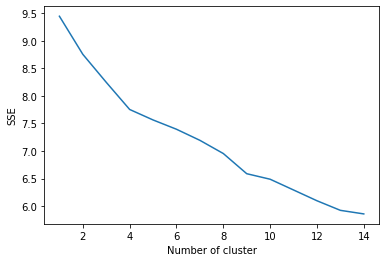

In [199]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

venues_grouped_clustering = venues_grouped.drop(['Neighbourhood', 'Region index'], 1)

sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(venues_grouped_clustering)
    #venues_grouped_clustering["Clusters"] = kmeans.labels_    
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
#plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [200]:
venues_grouped_clustering

,ATM,Accessories Store,Adult Boutique,Airport,Airport Lounge,Airport Service,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,...,Water Park,Waterfall,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.03125,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
142,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
143,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0
144,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


## Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into clusters.

In [201]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 6

venues_grouped_clustering = venues_grouped.drop(['Neighbourhood', 'Region index'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([5, 2, 1, 3, 1, 4, 4, 4, 0, 4, 0, 0, 4, 2, 4, 2, 2, 0, 2, 2, 4, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 0, 2, 0, 0, 2, 4, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 4, 0,
       2, 0, 2, 2, 2, 2, 4, 0, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 0, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 0, 2, 0, 4, 2, 0, 2, 2, 2, 2,
       4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 0, 2, 4, 2, 4,
       2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2], dtype=int32)

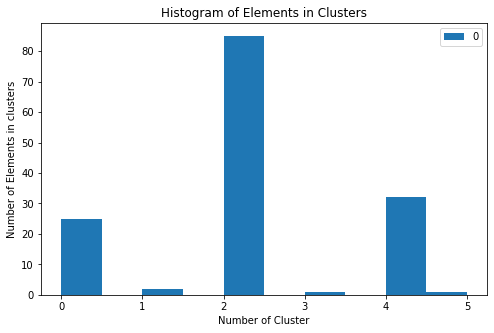

In [202]:
pd.DataFrame(kmeans.labels_).plot(kind='hist', figsize=(8, 5))
plt.title('Histogram of Elements in Clusters')
plt.ylabel('Number of Elements in clusters')
plt.xlabel('Number of Cluster') 
plt.show()

I choose to use six clusters. It seems it's optimal in our case. It gives us three fullfilled clusters and 3 outcasts.

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [203]:
# keep it for future analysis
dfTop10 = neighborhoods_venues_sorted

In [204]:
#neighborhoods_venues_sorted.drop(columns=['Cluster Labels'], inplace=True)
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted
#d_merged = moscow_regions

# merge d_grouped with initial data to add latitude/longitude for each neighborhood
#d_merged = d_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

#d_merged.head() # check the last columns!

,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,5,Kievskij #0,Train Station,Castle,Food,Fast Food Restaurant,Film Studio,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop
1,2,Filevskij Park #1,Gym / Fitness Center,Park,Pedestrian Plaza,Cosmetics Shop,Garden,Ski Area,Mobile Phone Shop,Gym,Go Kart Track,Coffee Shop
2,1,Novofedorovskoe #2,Park,Hotel Bar,Farm,Fast Food Restaurant,Film Studio,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop
3,3,Rogovskoe #3,Garden Center,Convenience Store,Food,Farmers Market,Fast Food Restaurant,Film Studio,Fish Market,Fishing Spot,Fishing Store,Flea Market
4,1,"""Mosrentgen"" #4",Park,Gym / Fitness Center,Zoo Exhibit,Food,Film Studio,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop
...,...,...,...,...,...,...,...,...,...,...,...,...
141,4,Ivanovskoe #141,Supermarket,Park,Gym,Pizza Place,Cosmetics Shop,Convenience Store,Department Store,Gym / Fitness Center,Stadium,Stables
142,2,Kosino-Uhtomskij #142,Gym / Fitness Center,Shopping Mall,Restaurant,Park,Sporting Goods Shop,Residential Building (Apartment / Condo),Supermarket,Fast Food Restaurant,Big Box Store,Arcade
143,2,Novokosino #143,Lake,Sushi Restaurant,Health Food Store,Grocery Store,Liquor Store,Convenience Store,German Restaurant,Bookstore,Supermarket,Japanese Restaurant
144,4,Nekrasovka #144,Convenience Store,Supermarket,Concert Hall,Gym Pool,Auto Workshop,Pet Store,Café,Food & Drink Shop,Bath House,Lake


In [206]:
clusterColors=['green', 'purple','orange', 'lightgray','magenta', 'white','blue','aqua', 'violet', 'blue', ]
map = folium.Map(location=[55.7532358, 37.6225412], zoom_start=8.5)
regions = folium.map.FeatureGroup()
for index in range(0, moscow_regions.shape[0]):
    regionName = moscow_regions.iloc[index,1]
    #print(regionName)
    try:
        for segmentIndex in range(0,len(regionPolyList[index])):
            segment = regionPolyList[index][segmentIndex]                              
            regions.add_child( folium.features.PolygonMarker(segment, color='gray', fill_color=clusterColors[kmeans.labels_[index]], weight=2) )
            segmentCenter = regionCentersList[index][segmentIndex]
            segmentRadius = radiusesList[index][segmentIndex]

    #            regions.add_child(
    #                folium.features.Circle(location=segmentCenter,radius=segmentRadius,fill=False,color='green')
    #            )

    #            regions.add_child(                
    #                folium.features.CircleMarker(
    #                    segmentCenter,
    #                    radius=8, 
    #                    color='yellow',
    #                    fill=True,
    #                    fill_color='red',
    #                    fill_opacity=0.6,
    #                    popup=str(index) + "." + regionName
    #                )
    #            )
    except:
        print('Error on index {}'.format(regionName) )
        
        
    
map.add_child(regions)


# display map
map

## Results

<div style='padding:0 120px 0 90px;'>
<h4 style=' line-height: 1.5em; text-indent: 2.5em; text-align: justify;'>

The map gives us illustration of clusters distribution. We have three big groups and three odd ones. 
Let's try to analyze their content. What are the common features of these clusters? Let's see and give them applicable names.       
</h4>
</div>

### Cluster 0

In [120]:
dfTop10[dfTop10['Cluster Labels']==0]

,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,0,Pervomajskoe #8,Italian Restaurant,Park,Tennis Court,Stables,Supermarket,Spa,Hotel,Construction & Landscaping,Fishing Spot,Gymnastics Gym
10,0,Vnukovo #10,Airport Service,Airport Lounge,Mobile Phone Shop,Scenic Lookout,Coffee Shop,Bar,Hotel,Performing Arts Venue,Gym Pool,Shopping Mall
11,0,Savelki #11,Park,Racetrack,Restaurant,Stables,Beach,Theater,Gourmet Shop,Sports Club,Soccer Field,Café
17,0,Krasnopahorskoe #17,Park,Basketball Court,Hotel,Eastern European Restaurant,Seafood Restaurant,Snack Place,Exhibit,Outdoors & Recreation,Burger Joint,Stables
32,0,Strogino #32,Park,Beach,Athletics & Sports,Surf Spot,Pet Store,Gym / Fitness Center,Pool,Trail,Massage Studio,Sauna / Steam Room
33,0,Moljaninovskij #33,Hotel,Restaurant,Eastern European Restaurant,Athletics & Sports,Flea Market,Food,Fast Food Restaurant,Film Studio,Fish Market,Fishing Spot
35,0,Kurkino #35,Park,Café,Bakery,Gym / Fitness Center,Pet Store,Gastropub,Butcher,Golf Course,Caucasian Restaurant,Fruit & Vegetable Store
37,0,Solnzevo #37,Park,Café,Pub,Art Gallery,Fast Food Restaurant,Bakery,Beach,Train Station,Coffee Shop,Car Wash
39,0,Voskresenskoe #39,Rest Area,Hotel,Movie Theater,Italian Restaurant,Beach,Resort,Restaurant,Clothing Store,Pool,Zoo Exhibit
44,0,Pokrovskoe-Stresnevo #44,Surf Spot,Park,Zoo Exhibit,Soccer Stadium,Canal Lock,Beach,Gym / Fitness Center,Flower Shop,Furniture / Home Store,Restaurant


### Cluster 1

In [121]:
dfTop10[dfTop10['Cluster Labels']==1]

,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,1,Novofedorovskoe #2,Park,Hotel Bar,Farm,Fast Food Restaurant,Film Studio,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop
4,1,"""Mosrentgen"" #4",Park,Gym / Fitness Center,Zoo Exhibit,Food,Film Studio,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop


### Cluster 2

In [76]:
dfTop10[dfTop10['Cluster Labels']==2]

,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,2,Filevskij Park #1,Gym / Fitness Center,Park,Pedestrian Plaza,Cosmetics Shop,Garden,Ski Area,Mobile Phone Shop,Gym,Go Kart Track,Coffee Shop
13,2,Silino #13,Pharmacy,Mobile Phone Shop,Toy / Game Store,Cosmetics Shop,Market,Electronics Store,Pizza Place,History Museum,Forest,Blini House
15,2,Krukovo #15,Park,Pizza Place,Fast Food Restaurant,Bar,Coffee Shop,Paper / Office Supplies Store,Paintball Field,Beer Bar,Gym / Fitness Center,Gym
16,2,Sukino #16,Park,Salon / Barbershop,Food & Drink Shop,Gym / Fitness Center,Cosmetics Shop,Convenience Store,Restaurant,Spa,Clothing Store,ATM
18,2,Nagatinskij Zaton #18,Gym / Fitness Center,Eastern European Restaurant,Sculpture Garden,Caucasian Restaurant,Park,Scenic Lookout,Coffee Shop,Market,History Museum,Palace
...,...,...,...,...,...,...,...,...,...,...,...,...
138,2,Vyhino-Julebino #138,Gym / Fitness Center,Pet Store,Japanese Restaurant,Cosmetics Shop,Park,Coffee Shop,Fast Food Restaurant,Supermarket,Sushi Restaurant,Grocery Store
140,2,Vostocnoe Izmajlovo #140,Gym / Fitness Center,Park,Pizza Place,Flower Shop,Supermarket,Farmers Market,Paper / Office Supplies Store,Exhibit,Middle Eastern Restaurant,Theater
142,2,Kosino-Uhtomskij #142,Gym / Fitness Center,Shopping Mall,Restaurant,Park,Sporting Goods Shop,Residential Building (Apartment / Condo),Supermarket,Fast Food Restaurant,Big Box Store,Arcade
143,2,Novokosino #143,Lake,Sushi Restaurant,Health Food Store,Grocery Store,Liquor Store,Convenience Store,German Restaurant,Bookstore,Supermarket,Japanese Restaurant


### Cluster 3

In [77]:
dfTop10[dfTop10['Cluster Labels']==3]

,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,3,Rogovskoe #3,Garden Center,Convenience Store,Food,Farmers Market,Fast Food Restaurant,Film Studio,Fish Market,Fishing Spot,Fishing Store,Flea Market


In [78]:
dfTop10[dfTop10['Cluster Labels']==4]

,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,4,Voronovskoe #5,Lake,Resort,Convenience Store,Restaurant,Pool,Steakhouse,Farmers Market,Ski Trail,River,Park
6,4,Mihajlovo-Arzevskoe #6,Stables,Recreation Center,Restaurant,Historic Site,Bistro,Pharmacy,Food & Drink Shop,Farm,Eastern European Restaurant,Fishing Store
7,4,Maruskinskoe #7,Scenic Lookout,Train Station,Racetrack,Park,Supermarket,Resort,Shopping Mall,Restaurant,Convenience Store,Gas Station
9,4,Matuskino #9,Supermarket,Brewery,Burger Joint,Electronics Store,Plaza,Café,ATM,Fish Market,Toy / Game Store,Fast Food Restaurant
12,4,Vnukovskoe #12,Museum,Bed & Breakfast,Convenience Store,Historic Site,Badminton Court,Coffee Shop,Big Box Store,Exhibit,Café,Forest
14,4,Kokoskino #14,Train Station,Convenience Store,Forest,Farm,Flower Shop,Farmers Market,Fast Food Restaurant,Film Studio,Fish Market,Fishing Spot
20,4,Klenovskoe #20,Lake,Gun Range,Restaurant,Theme Park,Bus Stop,Film Studio,Fish Market,Fishing Spot,Fishing Store,Flea Market
21,4,Dmitrovskij #21,Supermarket,Café,Park,Restaurant,Pizza Place,Eastern European Restaurant,Soccer Field,Auto Workshop,Fast Food Restaurant,Gym
23,4,Troizk #23,Restaurant,Supermarket,Café,Park,Big Box Store,Trail,Bakery,Gym,Rest Area,Electronics Store
25,4,Sapovskoe #25,Historic Site,Convenience Store,Park,Café,Gym,Grocery Store,Forest,Food Court,Food & Drink Shop,Fountain


### Cluster 5

In [79]:
dfTop10[dfTop10['Cluster Labels']==5]

,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,5,Kievskij #0,Train Station,Castle,Food,Fast Food Restaurant,Film Studio,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop


## Discussion 

<div style='padding:0 120px 0 90px;'>
<h4 style=' line-height: 1.5em; text-indent: 2.5em; text-align: justify;'>
Clusters <b>1</b>,<b>3</b> and <b>5</b> are clear exceptions. The properties of their elements differ sharply from others, since the size of these clusters is extremely small. It makes sense to exclude them from consideration.
Clusters <b>0</b>,<b>2</b>,<b>4</b> have comparable sizes.
    <p>
    Given the features of filling objects with clusters, the following typical names can be given.
<ul>
        <li>Cluster <b>0</b>. <i>Green area of parks and cafes</i>. This cluster is dominated by park areas, cafes and coffee shops. Other objects to a lesser extent characterize this cluster.</li>

<li>Cluster <b>2</b>. <i>Shops and cafes</i>. Park zones also prevail in this cluster, but there is a significant preponderance regarding various types of stores. Other objects to a lesser extent characterize this cluster.</li>

<li>Cluster <b>4</b>. <i>Shops and supermarkets</i>. As for cluster 2, the predominance of shopping facilities is becoming overwhelming. Other objects to a lesser extent characterize this cluster.</li> </ul></p></h4>
</div>

## Conclusion 

* We were able to get the division of the regions of the city of Moscow into several clusters. 
* The accuracy of this method is somewhat degraded due to the lack of the number of objects returned by the Foursquare API. But this does not prevent a general idea of the properties of the obtained groupings. 
* Also, some simplifications of mathematical methods introduce an error when calculating coordinates on a spherical surface, but this does not violate general principles.